# **Gapminder_Key Project**


**Import necessary packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load Gapminder_key_1 & Gapminder_key_2 dataset**

In [2]:
df1=pd.read_excel('/content/Gapminder_key_1.xlsx')
df2=pd.read_excel('/content/Gapminder_key_2.xlsx')

In [3]:
# Check columns form Gapminder_key_1 dataframe
df1.columns

Index(['country', 'year', 'population', 'continent'], dtype='object')

In [5]:
# Check size of Gapminder_key_1 dataframe
df1.shape

(1704, 4)

In [6]:
# Collect information of Gapminder_key_1 dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     1704 non-null   object
 1   year        1704 non-null   int64 
 2   population  1704 non-null   int64 
 3   continent   1704 non-null   object
dtypes: int64(2), object(2)
memory usage: 53.4+ KB


In [7]:
# Check columns form Gapminder_key_2 dataframe
df2.columns

Index(['country', 'year', 'life_exp', 'gdp_cap'], dtype='object')

In [8]:
# Check size of Gapminder_key_2 dataframe
df2.shape

(1704, 4)

In [9]:
# Collect information of Gapminder_key_2 dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   1704 non-null   object 
 1   year      1704 non-null   int64  
 2   life_exp  1704 non-null   float64
 3   gdp_cap   1704 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.4+ KB


In [10]:
#Merage df1 & df2 data
df_gapminder=pd.merge(df1,df2,how='outer')
df_gapminder[:3]

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710


In [11]:
# Find the shape of data 
df_gapminder.shape

(1704, 6)

In [12]:
# Find the Information about columns & datatype
df_gapminder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 93.2+ KB


In [13]:
# Collect describtion
df_gapminder.describe

<bound method NDFrame.describe of           country  year  population continent  life_exp     gdp_cap
0     Afghanistan  1952     8425333      Asia    28.801  779.445314
1     Afghanistan  1957     9240934      Asia    30.332  820.853030
2     Afghanistan  1962    10267083      Asia    31.997  853.100710
3     Afghanistan  1967    11537966      Asia    34.020  836.197138
4     Afghanistan  1972    13079460      Asia    36.088  739.981106
...           ...   ...         ...       ...       ...         ...
1699     Zimbabwe  1987     9216418    Africa    62.351  706.157306
1700     Zimbabwe  1992    10704340    Africa    60.377  693.420786
1701     Zimbabwe  1997    11404948    Africa    46.809  792.449960
1702     Zimbabwe  2002    11926563    Africa    39.989  672.038623
1703     Zimbabwe  2007    12311143    Africa    43.487  469.709298

[1704 rows x 6 columns]>

#### 1. Country and continent are string data type.Please convert them into categorial data type using programming constructs.

In [14]:
for i in df_gapminder:
  if df_gapminder[i].dtype==object:
    df_gapminder[i]=df_gapminder[i].astype('category')    

In [15]:
#Check the columns data type
df_gapminder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     1704 non-null   category
 1   year        1704 non-null   int64   
 2   population  1704 non-null   int64   
 3   continent   1704 non-null   category
 4   life_exp    1704 non-null   float64 
 5   gdp_cap     1704 non-null   float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 77.9 KB


#### 2. Count the number of countries in this dataset.

In [16]:
df_gapminder['country'].nunique()

142

#### 3.Which country had the lowest life expectancy in 2007? 

In [32]:
# Create new dataframe with filter of year =2007
df_gapminder_2007=df_gapminder[df_gapminder['year']==2007]
df_gapminder_2007['life_exp'].min() 

39.613

#### 4. Which country had the highest GDP per capita in 2007?

In [18]:
max_gdp=df_gapminder_2007['gdp_cap'].max()
highest=df_gapminder_2007[df_gapminder_2007['gdp_cap']==max_gdp]
highest

,country,year,population,continent,life_exp,gdp_cap
1151,Norway,2007,4627926,Europe,80.196,49357.19017


#### 5.  Which country had the highest GDP per capita in 2007?

In [19]:
#Calculate high gdp from gdp & population
df_gapminder_2007['high_gdp']=df_gapminder_2007.gdp_cap*df_gapminder_2007.population
#Calculate with highest gdp wit max function
df_gapminder_2007[df_gapminder_2007.high_gdp==df_gapminder_2007.high_gdp.max()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,year,population,continent,life_exp,gdp_cap,high_gdp
1619,United States,2007,301139947,Americas,78.242,42951.65309,1.293446e+13


#### 6. Is there any change in the trend from 1952 to 2007 in life expectancy?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Change in trend from 1952 to 2007 in life expectancy')

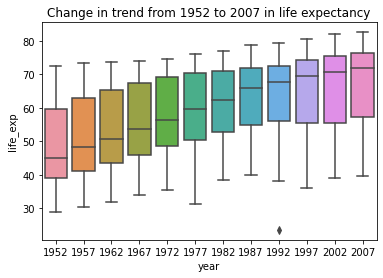

In [20]:
import seaborn as sns
x=df_gapminder['year']
y=df_gapminder['life_exp']
ax=sns.boxplot(x,y)
plt.title('Change in trend from 1952 to 2007 in life expectancy')

#### 7. Which contient has the lowest life expectancy in 2007?

In [26]:
df_lowest_life=df_gapminder[df_gapminder.groupby(['continent'])and df_gapminder['year']==2007]
df_lowest_life

,country,year,population,continent,life_exp,gdp_cap
11,Afghanistan,2007,31889923,Asia,43.828,974.580338
23,Albania,2007,3600523,Europe,76.423,5937.029526
35,Algeria,2007,33333216,Africa,72.301,6223.367465
47,Angola,2007,12420476,Africa,42.731,4797.231267
59,Argentina,2007,40301927,Americas,75.320,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,2007,85262356,Asia,74.249,2441.576404
1667,West Bank and Gaza,2007,4018332,Asia,73.422,3025.349798
1679,"Yemen, Rep.",2007,22211743,Asia,62.698,2280.769906
1691,Zambia,2007,11746035,Africa,42.384,1271.211593


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


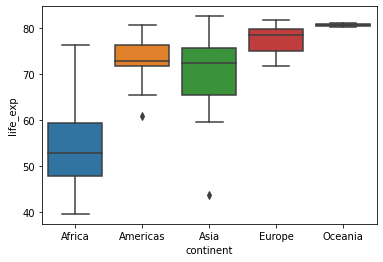

In [27]:
x=df_lowest_life['continent']
y=df_lowest_life['life_exp']
ax=sns.boxplot(x,y)
#sns.barplot(x,y)

In [29]:
df_lowest_life_con=df_lowest_life[df_lowest_life['life_exp']==df_lowest_life['life_exp'].min()]
df_lowest_life_con

,country,year,population,continent,life_exp,gdp_cap
1463,Swaziland,2007,1133066,Africa,39.613,4513.480643


#### 8. What was the average life expectancy, GDP and GDP per capita in 2007?

In [30]:
# Average life expectancy with describe
df_lowest_life.describe()
#The average life expectancy in 2007 = 67.007423 
#The average GDP in 2007             = 11680
#The average GDP per capita in 2007  = 4.092207e+11

,year,population,life_exp,gdp_cap
count,142.0,1.420000e+02,142.000000,142.000000
mean,2007.0,4.402122e+07,67.007423,11680.071820
std,0.0,1.476214e+08,12.073021,12859.937337
min,2007.0,1.995790e+05,39.613000,277.551859
25%,2007.0,4.508034e+06,57.160250,1624.842248
50%,2007.0,1.051753e+07,71.935500,6124.371108
75%,2007.0,3.121004e+07,76.413250,18008.835640
max,2007.0,1.318683e+09,82.603000,49357.190170


#### 9. Is there any relationship between life expectancy and GDP per capita? 
Please show each data point by continent.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relationship between life expectancy and GDP per capita')

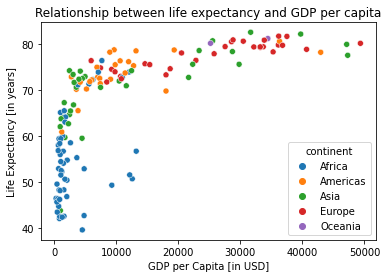

In [33]:
x=df_gapminder_2007['gdp_cap']
y=df_gapminder_2007['life_exp']
sns.scatterplot(x,y,hue=df_gapminder_2007['continent'])
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title("Relationship between life expectancy and GDP per capita")

Here higher life expectancy having higher GDP per capita

#### 10. What can be done to see the relationship better between life expectancy and GDP per Capita?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relationship between life expectancy and GDP per capita')

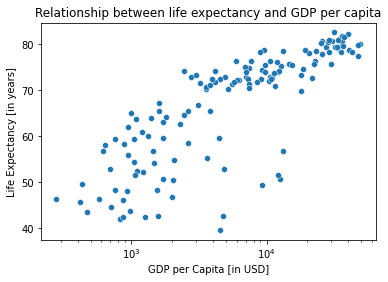

In [34]:
x=df_gapminder_2007['gdp_cap']
y=df_gapminder_2007['life_exp']
sns.scatterplot(x,y)
plt.xscale('log')  # Converting x scale into log
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title("Relationship between life expectancy and GDP per capita")

From given plot clearly say that their is correlation between life expectency and GDP per capita. As life expectency increases GDP per capita also increases.